In [1]:
import draw2Svg as dw

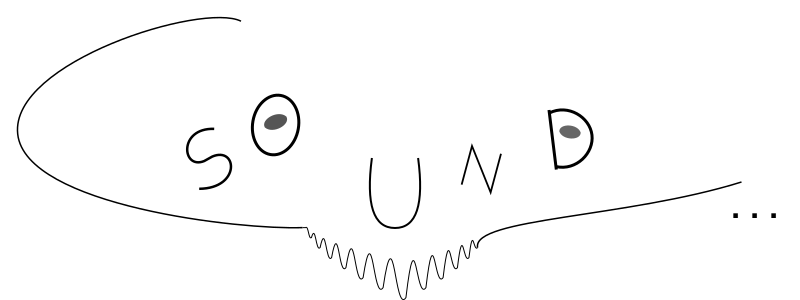

In [265]:
w,h = 800,300
d = dw.Drawing(w,h)

xnum = 2 # posts (= one more than divisions)
ynum = 2
mleft = 10
mright = 20
mtop = -10
mbot = 70
xsize = w-mleft-mright
ysize = h-mtop-mbot
xunit = xsize / (xnum-1)
yunit = ysize / (ynum-1)

exec(open('../01/draw2Svg_funs.py').read())
exec(open('../01/draw2Svg_musicnotation.py').read())

def xgrid(inval):
    """for xnum=4, inval is from 0 (left) to 3 (right)
    as range to write"""
    return scale(inval,0,xnum-1,mleft,mleft+xsize)

def ygrid(inval):
    """for num=11, inval is from 0 (top) to 10 (bottom)
    as range to write"""
    return scale(inval,0,ynum-1,mtop,mtop+ysize)

def myS(x=50,y=50,h=40,rot=10,sw=1,c='black',**args):
    """xy is top left of it.  rot = rotate
    h = height sw = stroke-width   c=color"""
    p1 = x+h*58/40,y+h*12/40
    p2a = x+h*46/40,y+h*31/40
    p2b = x+h*52/40,y+h*29.5/40
    p3 = x+h*38/40,y+h*48/40
    p = dw.Path(fill='none',stroke=c,stroke_width=sw,
                transform='rotate(%f,%f,%f)'%(rot,x,y),**args)
    p.M(*p1)
    cp1a = x+h*35/40,y+h*5/40
    cp1b = x+h*30/40,y+h*33/40
    p.C(*cp1a,*cp1b,*p2a)
    p.L(*p2b)
    cp2a = x+h*70/40,y+h*27/40
    cp2b = x+h*65/40,y+h*55/40
    p.C(*cp2a,*cp2b,*p3)
    d.append(p)

def myU(x=50,y=50,h=40,sw=1,c='black',rot=0,**args):
    """x,y is top left"""
    w = h*.66
    p1 = x,y
    p2 = x+w/2,y+h
    p3 = x+w,y
    c1 = x-w*.2,y+h
    c2 = x+w*1.2,y+h
    p = dw.Path(fill='none',stroke=c,stroke_width=sw,
                transform='rotate(%f,%f,%f)'%(rot,x,y),**args)
    p.M(*p1)
    p.Q(*c1,*p2)
    p.Q(*c2,*p3)
    d.append(p)

def myN(x=50,y=50,h=40,sw=1,c='black',rot=0,**args):
    """x,y is top left"""
    w = h*.75
    p1 = x,y
    p2 = x,y+h
    p3 = x+w,y
    p4 = x+w,y+h
    p = dw.Path(fill='none',stroke=c,stroke_width=sw,
                transform='rotate(%f,%f,%f)'%(rot,x,y),**args)
    p.M(*p2).L(*p1).L(*p4).L(*p3)
    d.append(p)

def myD(x=50,y=50,h=40,sw=1,c='black',rot=0,**args):
    """x,y is top left"""
    w = h*.66
    p1 = x,y
    p2 = x,y+h
    p3 = x+w,y+h/2
    diff = h/20
    c1 = x+w/2,y-h/15
    c2 = x+w*1,y+h*.2
    c2a = x+w*1,y+h*.8
    c3 = x+w/2,y+h+h/15
    p = dw.Path(fill='none',stroke=c,stroke_width=sw,
                transform='rotate(%f,%f,%f)'%(rot,x,y),**args)
    p.M(*p1)
    p.L(*p2)
    p.M(x,y+diff)
    p.C(*c1,*c2,*p3)
    p.C(*c2a,*c3,x,y+h-diff)
    d.append(p)

def sinemouth(x=10,y=50,periods=11,ampmin=1,ampmax=20,pmin=1,pmax=20,yshiftmin=0,yshiftmax=20,
              c='black',f='none',sw=1,**args):
    """a sine with ampmax and pmax in the middle
    make periods to be an odd number please
    returns the final point"""
    # construct amplitude, period and yshift increments
    ampincr = (ampmax-ampmin) / ((periods-1)/2)
    pincr = (pmax-pmin) / ((periods-1)/2)
    yshincr = (yshiftmax-yshiftmin) / ((periods-1)/2)
    A = ampmin
    P = pmin
    yshift = yshiftmin
    cs = dw.Path(fill=f,stroke=c,stroke_width=sw,**args)
    cs.M(x,y)
    for i in range(periods):
        p = x+P,y+yshift
        c1 = x+P/2,y-A
        c2 = x+P/2,y+A+yshift
        cs.C(*c1,*c2,*p)
        x += P
        if i < periods/2:
            A += ampincr
            P += pincr
            yshift += yshincr
        else:
            A -= ampincr
            P -= pincr
            yshift -= yshincr
    d.append(cs)
    return p

# C
c = dw.Path(fill='none',stroke='black',stroke_width=1.5)
p1 = xgrid(.3),ygrid(.13)
c1 = xgrid(.25),ygrid(.05)
c2 = xgrid(0),ygrid(.3)
p2 = xgrid(0.01),ygrid(.6)
c3 = xgrid(.3),ygrid(1)
p3 = xgrid(.38),ygrid(.99)
c.M(*p1)
c.C(*c1,*c2,*p2)
c.S(*c3,*p3)

# C sine / mouth
x,y = p3
p4 = sinemouth(*p3,13,0,15,3,20,0,60)
#print(p4)

c4 = xgrid(.6),ygrid(.95)
c5 = xgrid(.8),ygrid(.95)
p5 = xgrid(.95),ygrid(.8)
c.M(*p4)
c.C(*c4,*c5,*p5)
d.append(c)


# S
myS(xgrid(.15),ygrid(.6),60,-15,sw=2.5)

# O
x,y = xgrid(.33),ygrid(.5)
owid,ohgt = 23,30
xcenter = x+owid/2
ycenter = y+ohgt/2
o = dw.Ellipse(xcenter,ycenter,owid,ohgt,stroke='black',fill='none',stroke_width=3,
               transform='rotate(10,%f,%f)'%(xcenter,ycenter))
d.append(o)
note(xcenter,ycenter-3,18,fill='#555')

# U
myU(xgrid(.47),ygrid(.7),70,sw=2)

# N
myN(xgrid(.6),ygrid(.65),rot=15,sw=1.8)

# D
x = xgrid(.7)
y = ygrid(.5)
myD(x,y,60,rot=-7,sw=3)
x += 21
y += 22
note(x,y,16,fill='#666',transform='rotate(30,%f,%f)'%(x,y))

# dots
text('...',xgrid(.93),ygrid(.95),fontsize=32,font_family='courier',font_weight='bold')


#d.setPixelScale(1)
d.savePng('../../images/00-preface-image.png')
d

(154.0, 58.0)


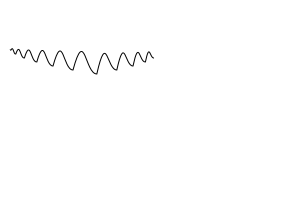

In [245]:
d = dw.Drawing(300,200)

def sinemouth(x=10,y=50,periods=11,ampmin=1,ampmax=20,pmin=1,pmax=20,yshiftmin=0,yshiftmax=20,
              c='black',f='none',sw=1,**args):
    """a sine with ampmax and pmax in the middle
    make periods to be an odd number please
    returns the final point"""
    # construct amplitude, period and yshift increments
    ampincr = (ampmax-ampmin) / ((periods-1)/2)
    pincr = (pmax-pmin) / ((periods-1)/2)
    yshincr = (yshiftmax-yshiftmin) / ((periods-1)/2)
    A = ampmin
    P = pmin
    yshift = yshiftmin
    cs = dw.Path(fill=f,stroke=c,stroke_width=sw,**args)
    cs.M(x,y)
    for i in range(periods):
        p = x+P,y+yshift
        c1 = x+P/2,y-A
        c2 = x+P/2,y+A
        cs.C(*c1,*c2,*p)
        x += P
        if i < periods/2:
            A += ampincr
            P += pincr
            yshift += yshincr
        else:
            A -= ampincr
            P -= pincr
            yshift -= yshincr
    d.append(cs)
    return p


p = sinemouth()
print(p)
d

In [223]:
help(range)

Help on class range in module builtins:

class range(object)
 |  range(stop) -> range object
 |  range(start, stop[, step]) -> range object
 |  
 |  Return an object that produces a sequence of integers from start (inclusive)
 |  to stop (exclusive) by step.  range(i, j) produces i, i+1, i+2, ..., j-1.
 |  start defaults to 0, and stop is omitted!  range(4) produces 0, 1, 2, 3.
 |  These are exactly the valid indices for a list of 4 elements.
 |  When step is given, it specifies the increment (or decrement).
 |  
 |  Methods defined here:
 |  
 |  __bool__(self, /)
 |      self != 0
 |  
 |  __contains__(self, key, /)
 |      Return key in self.
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __getitem__(self, key, /)
 |      Return self[key].
 |  
 |  __gt__(self, value, /)
 |      Return self>value.
 |  
 |  __hash__(self, /)
 |